## Finance_0

Keywords: Stationarity, Cointegration, Q-Q plot, ACF, PACF

In [167]:
## Import Packages
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math  
import random 
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as stats

In [168]:
## Data Structure

## Get the historical prices
start = '2014-01-01'
end = datetime.datetime.now()
data = get_pricing('TSLA', fields='price', start_date=start, end_date=end, frequency ='minute')
data.head(15) # show first 15 rows

2014-01-02 14:31:00+00:00    149.111
2014-01-02 14:32:00+00:00    148.621
2014-01-02 14:33:00+00:00    148.390
2014-01-02 14:34:00+00:00    148.600
2014-01-02 14:35:00+00:00    148.476
2014-01-02 14:36:00+00:00    147.750
2014-01-02 14:37:00+00:00    148.260
2014-01-02 14:38:00+00:00    147.830
2014-01-02 14:39:00+00:00    147.750
2014-01-02 14:40:00+00:00    147.100
2014-01-02 14:41:00+00:00    147.100
2014-01-02 14:42:00+00:00    146.890
2014-01-02 14:43:00+00:00    147.398
2014-01-02 14:44:00+00:00    147.190
2014-01-02 14:45:00+00:00    147.510
Name: Equity(39840 [TSLA]), dtype: float64

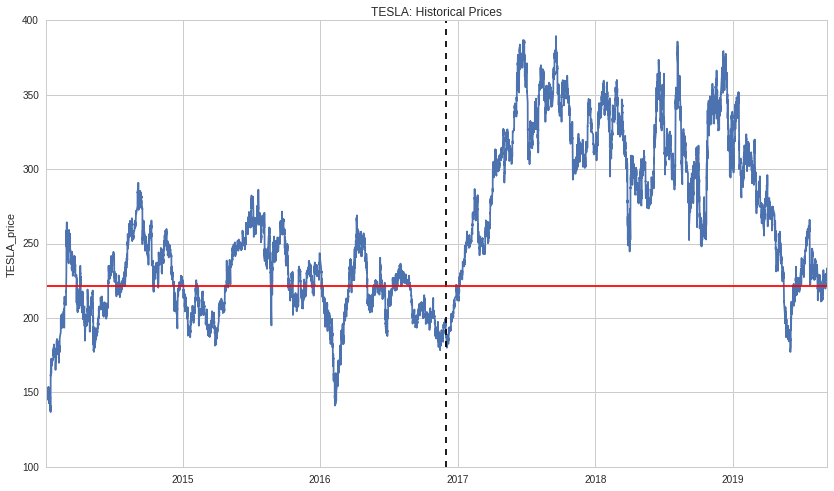

In [169]:
## Time break (Variable)
time_break = '2016-12-01'

## Plot prices
plt.plot(data.index, data.values)
plt.ylabel('TESLA_price')
plt.title('TESLA: Historical Prices')
plt.axvline(time_break, color='black', linestyle='--')

## Plot horizontal line for period 1
plt.axhline(np.mean(data.loc[start:time_break].values),color='red', linestyle='solid')


## Plot horizontal line for period 2
plt.axhline(np.mean(data.loc[time_break:end].values),color='red', linestyle='solid')


plt.grid(True)
plt.show()

We can see that the average of the stochastic process (price) changes over time. Hence, it suggests that the series follows a non-stationary process. Let's move to the next step and run the ADF test.

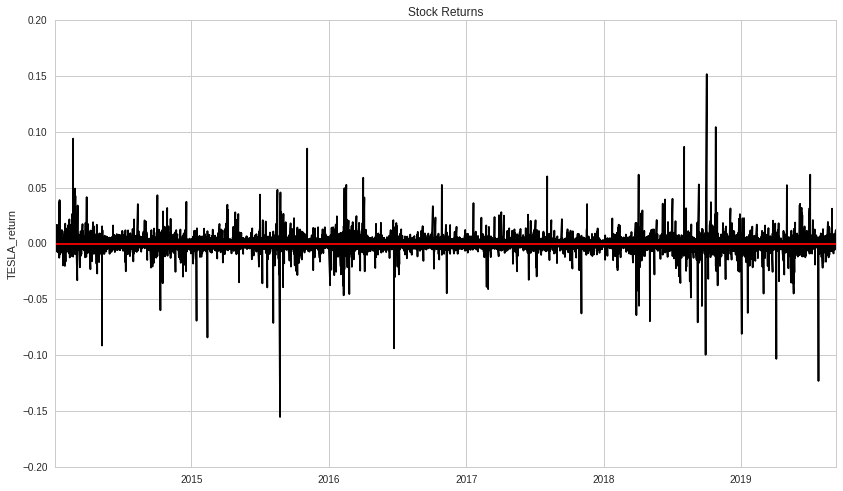

In [170]:
## Remove all missing data in order to compute the stock returns 
TSLA_pct = data.pct_change()
TSLA_return = TSLA_pct.dropna()
plt.plot(TSLA_return, color='black')
plt.axhline(y=np.mean(TSLA_return),color='red', linestyle='solid')
plt.ylabel('TESLA_return')
plt.title('Stock Returns')
plt.grid(True)
plt.show()

On the other hand, the mean of returns is centered on zero throughout the series.

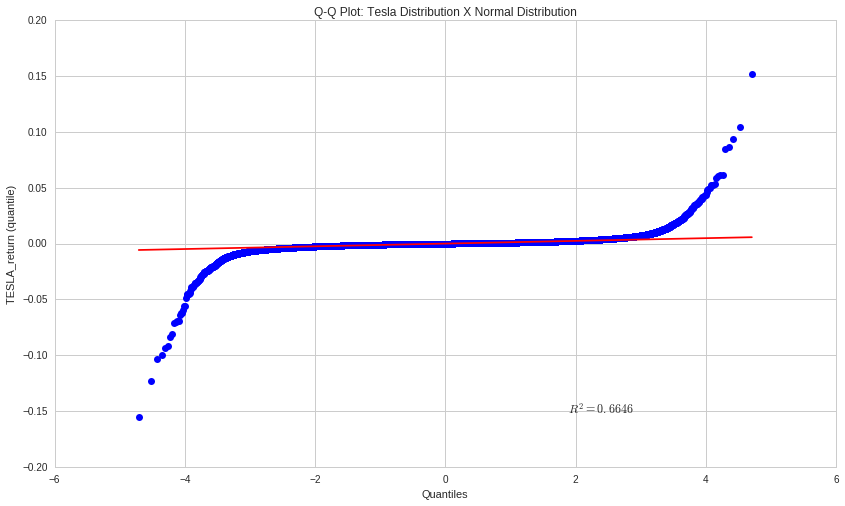

In [171]:
## Q-Q Plot
stats.probplot(TSLA_return, dist="norm", plot=plt)
plt.ylabel('TESLA_return (quantile)')
plt.title('Q-Q Plot: Tesla Distribution X Normal Distribution')
plt.grid(True)
plt.show()

The figure above shows the distribution of the stock returns against the normal distribution. The plot does not align perfectly with the diagonal. It shows that there is a significant difference between the size of their tails. For instance, the curvature found on both ends implies that the tails of our data are heavier than tail of the normal distribution.

## Cointegration

**Problem 7.7 - Statistical Analysis of Financial Data (René Carmona)**

Construct a sample $\{{W_n}\}_{n = 1,...,N}$ of size $ N = 1,024 $ from the normal distribution N(0, 1), construct the random walk $ S_n = S_0 + W_1 + ... + W_n $ starting from $S_0 = 0$, and construct two independent white noise sequences $\{\epsilon_{n}^{(1)}\}_{n = 1,...,N}$ and $\{\epsilon_{n}^{(2)}\}_{n=1,...,N}$ from the distribution $ N(0, 0.16)$ which are independent of $\{{W_n}\}_{n=1,...,N}$. Give on the same figure the plots of the graphs of the time series $\{X_n^{(1)}\}_{n = 1,...,N}$ and $\{X_n^{(2)}\}_{n = 1,...,N}$ defined by:

$$X_{n}^{(1)} = S_n + e_n^{(1)}$$ and $$X_{n}^{(2)} = S_n + e_n^{(2)}$$

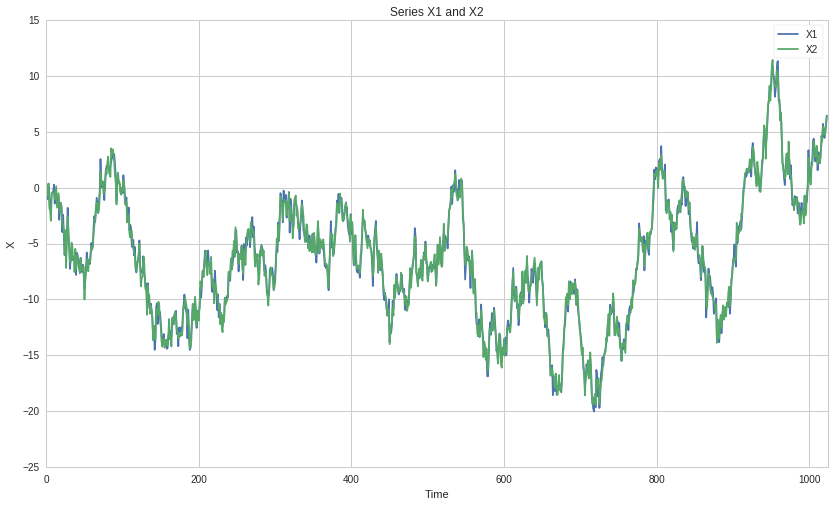

In [172]:
## The random module uses the seed value as a base to generate a random number 
random.seed(32)

## Generate a sample of size N = 1024 from the standard normal distribution
N = 1024

WN = np.random.normal(0, 1, N)

## Generate a sample of errors from a given Gaussian distribution

e_1 = np.random.normal(0, math.sqrt(0.16), N)

e_2 = np.random.normal(0, math.sqrt(0.16), N)

## Compute X_1 and X_2

X_1 = np.zeros(N)

X_2 = np.zeros(N)

abs_axis = range(0,N)

# For Loop

for i in abs_axis:
    X_1[i] = sum(WN[0:i]) + e_1[i]
    X_2[i] = sum(WN[0:i]) + e_2[i]

## Plot the series X1 and X2 on the same figure
plt.plot(abs_axis, X_1, label='X1')
plt.plot(abs_axis, X_2, label='X2')
plt.legend()
plt.ylabel('X')
plt.xlabel('Time')
plt.title('Series X1 and X2')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,N])
plt.show()

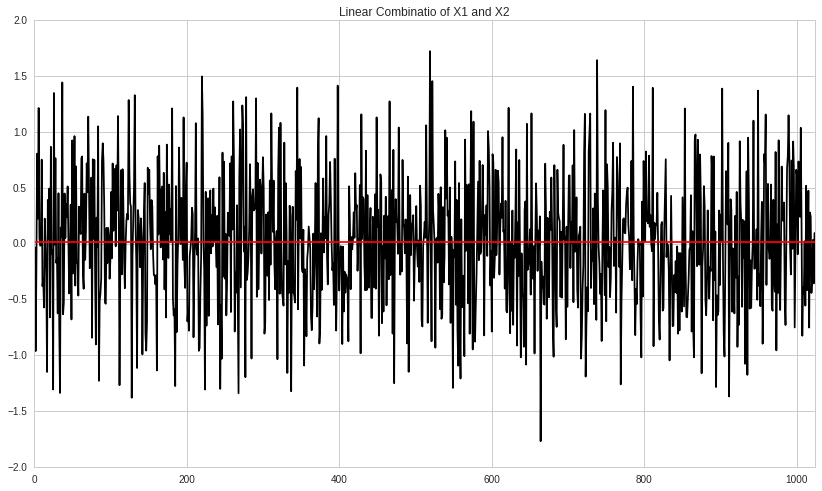

In [173]:
## Give the plot of linear combination of X1 e X2 given by a cointegration vector
X_dif = X_1 - X_2

plt.plot(abs_axis, X_dif, color="black")
plt.title('Linear Combinatio of X1 and X2')
plt.axhline(y=np.mean(X_dif),color='red', linestyle='solid')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,N])
plt.show()

Primeiramente, podemos notar que as duas séries separadamente possuem um componente de tendência denotado pelo $S_n$, configurando-as como séries integradas de ordem 1, isto é, não-estacionárias. No entanto, as séries podem ser ditas cointegradas caso haja alguma combinação linear capaz de torná-las estacionárias. Em particular, para este exemplo, podemos construir uma série resultante pela diferença de ambas: $ X_{n}^{(1)} - X_{n}^{(2)} = e_{n}^{(1)} - e_{n}^{(2)}$. Claramente a série resultante é um ruído branco com distribuição normal $N(0, 0.32)$ uma vez que o passeio aleatório, tendência compartilhada pelos dois modelos, é eliminado ao ser computada a diferença. Verificamos a estacionariedade da série combinada no gráfico mencionado.

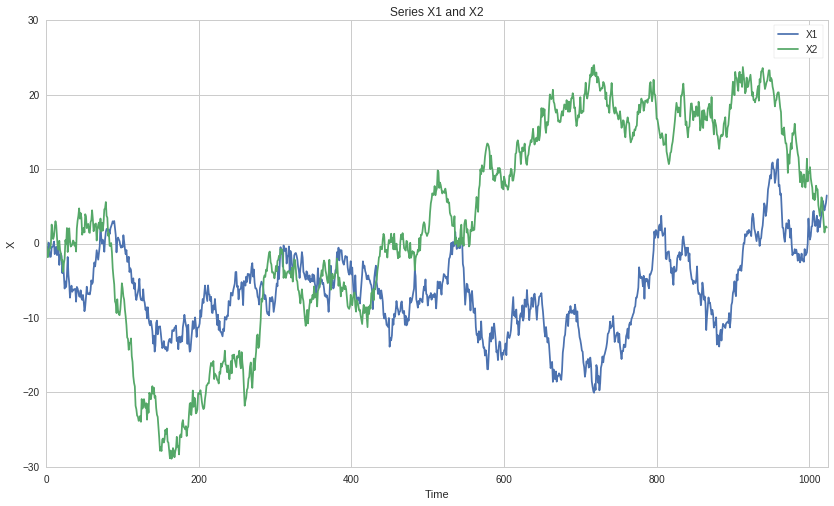

In [174]:
## Define another white noite
WN_2 = np.random.normal(0, 1, N)

# For Loop

for i in abs_axis:
    X_1[i] = sum(WN[0:i]) + e_1[i]
    X_2[i] = sum(WN_2[0:i]) + e_2[i]

## Plot the series X1 and X2 on the same figure
plt.plot(abs_axis, X_1, label="X1")
plt.plot(abs_axis, X_2, label="X2")
plt.legend()
plt.ylabel('X')
plt.xlabel('Time')
plt.title('Series X1 and X2')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,N])
plt.show()

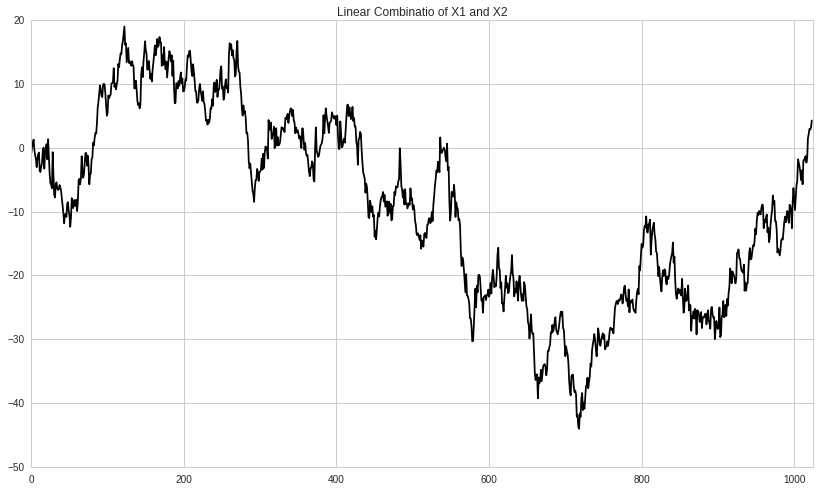

In [175]:
## Apply same linear combination of X1 and X2

X_dif2 = X_1 - X_2

plt.plot(abs_axis, X_dif2, color="black")
plt.title('Linear Combinatio of X1 and X2')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,N])
plt.show()

Em relação ao gráfico acima, verificamos que diferentemente do exemplo anterior as séries não são cointegradas. Como ponto de partida para análise, utilizamos séries não estacionárias que possuem componente de tendência e
ruídos diferentes (embora provenientes da mesma distribuição). Em seguida, procura-se uma combinação linear do tipo $ a_1 \cdot X_{n}^{(1)} + a_2 \cdot X_{n}^{(2)} = a_1 \cdot S_{n}^{(1)} + a_2 \cdot S_{n}^{(2)} + a_1 \cdot e_{n}^{(1)} + a_2 \cdot e_{n}^{(2)} $ para verificar se é possível torná-las estacionárias. Entretanto, para qualquer combinação com $ (a1, a2) \neq 0 $, nota-se que não há reversão à média.

Give the scatterplot of $ X_n^{(2)}$ against  $ X_n^{(2)}$, add the least squares regression line and give ACF of the residuals. Comment.

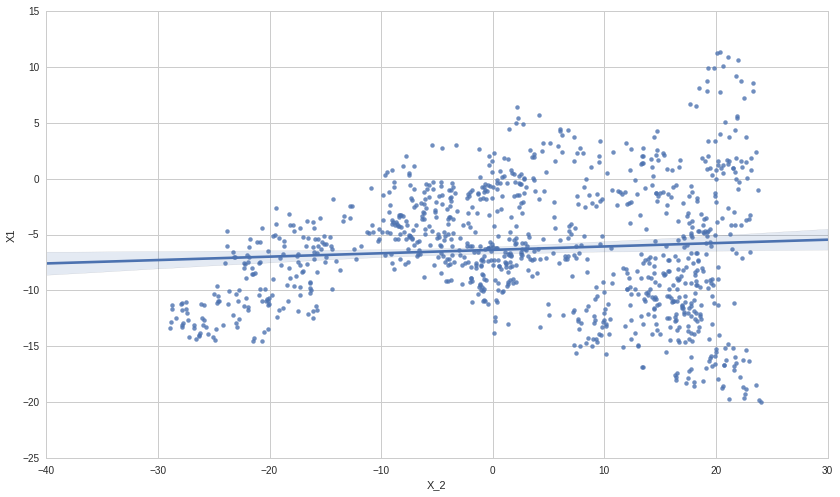

In [176]:
## Give the scatterplot of X2 and X1
## Add the least squares regression line
sns.regplot(x=X_2, y=X_1)
plt.ylabel('X1')
plt.xlabel('X_2')
plt.show()

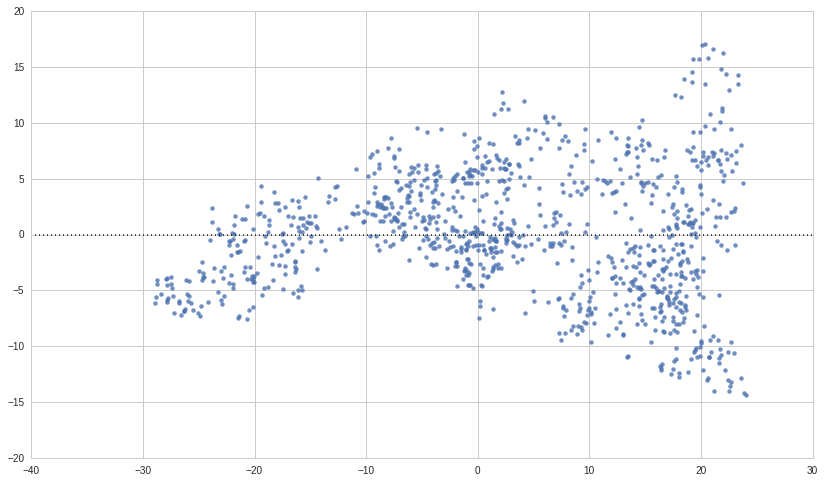

In [177]:
## Time series plot of the residuals 
sns.residplot(x=X_2, y=X_1)
plt.show()

**Note:** Sklearn expects X to be a matrix, in which every row is one sample. If one supply a list of size N, it gets converted to a matrix of one row with N columns instead of a matrix with 1 column and N rows. Hence, it requires to transpose the list using the function numpy.arrays as follows: X = np.array(X).T 

In [178]:
## ACF ##

X2_T = np.array([X_2]).T

## Model
model = LinearRegression()

## Fit the data
model.fit(X2_T,X_1)

## Predict
X1_pred = model.predict(X2_T)

## Residuals

residuals = X1_pred - X_1

## SSR
SSR = np.sum((residuals)**2)

**Note:** The parameters for subplot are: number of rows, number of columns, and subplot index.

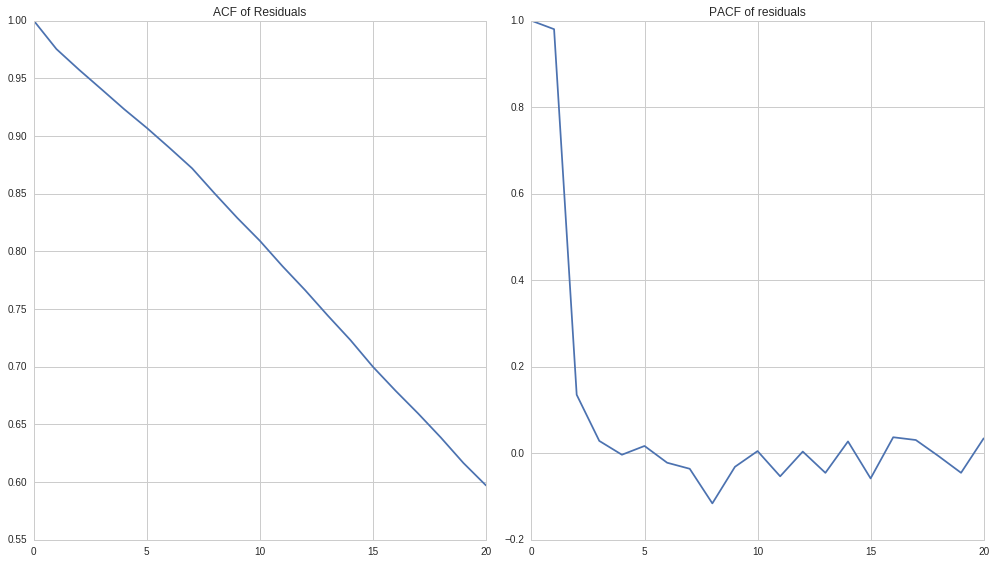

In [179]:
## ACF
acf_res = acf(residuals, nlags=20)
plt.subplot(1, 2, 1)
plt.title('ACF of Residuals')
plt.plot(acf_res)

##PACF
pacf_res = pacf(residuals, nlags=20, method='ols')
plt.subplot(1, 2, 2)
plt.title('PACF of residuals')
plt.plot(pacf_res)

plt.tight_layout()

plt.show()

O decaimento suave e lento do padrão de tendência referente à função de autocorrelação sugere que o dados seguem um processo de memória longa. A persistência do ACF aponta também que a primeira diferença seja necessária para garantir a estacionariedade da série. No que diz respeito ao PACF, verificamos que este se caracteriza por apresentar considerável correlação parcial no primeiro lag em comparação com os demais, portanto, há razões estatísticas para argumentar que os resíduos são correlacionados intertemporalmente.